## Exercise 5

In [68]:
from PIL import Image
import numpy as np
import PIL.Image
import IPython.display
import io

Image shape:  (512, 512)
Original : 


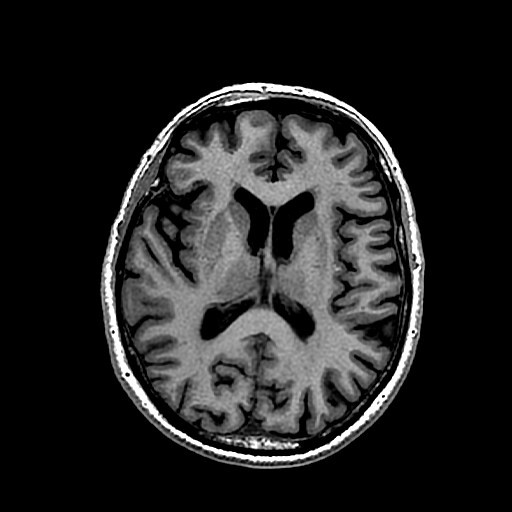

Filter 1 : 


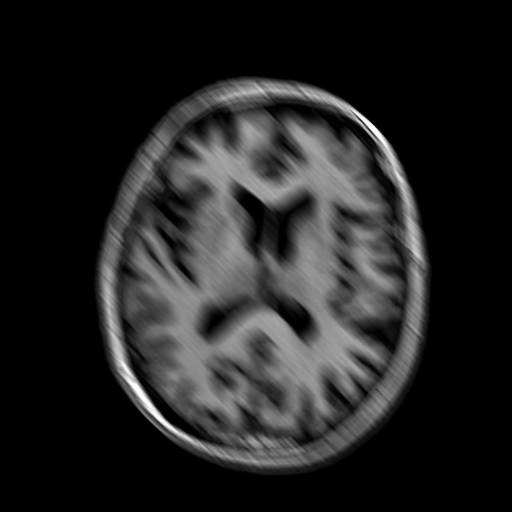

Filter 2 : 


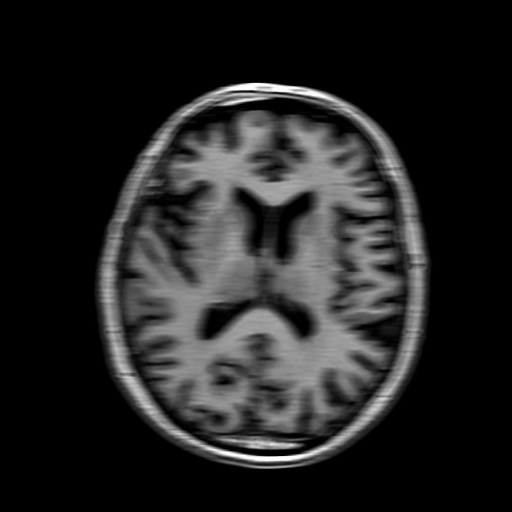

Filter 1 + Filter 2 : 


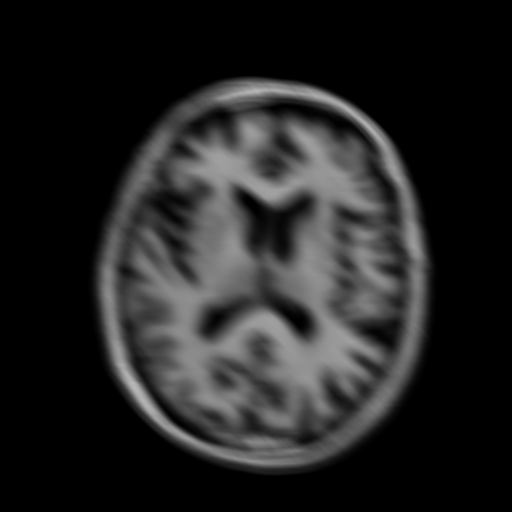

Filter 2 + Filter 1 : 


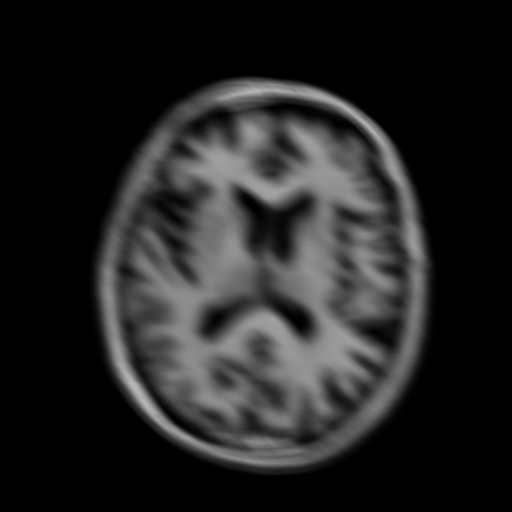

In [72]:
def load_image(filename) :
    img = Image.open(filename)
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

def show_image(a, fmt='png', title='Unnamed'):
    print(title, ': ')
    a = np.uint8(a)
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))
    
def apply_filter(source, conv_filter):
    res = source * conv_filter
    return res.sum()

def filter_image(image, kernel, pad=7):
    fil_image = np.zeros(image.shape, dtype="int32")

    for y in range(pad, image.shape[0] - pad):
        for x in range(pad, image.shape[1] - pad):
            fil_image[x][y] = apply_filter(image[x-pad:x+pad+1, y-pad:y+pad+1], kernel)
            
    return fil_image

kernel1 = np.eye(15) * (1/15)
kernel2 = np.zeros((15, 15))
for i in range(15):
    kernel2[7, i] = 1 / 15
image = load_image('axial-brain.jpg')
print('Image shape: ', image.shape)
fil_image = filter_image(image, kernel1)
fil_image2 = filter_image(image, kernel2)
fil_image3 = filter_image(fil_image, kernel2)
fil_image4 = filter_image(fil_image2, kernel1)

show_image(image, title='Original')
show_image(fil_image, title='Filter 1')
show_image(fil_image2, title='Filter 2')
show_image(fil_image3, title='Filter 1 + Filter 2')
show_image(fil_image4, title='Filter 2 + Filter 1')


### Subtask c
- Convolution order does not matter (addition and multiplication are cummatative)

### Subtask d
- Not this is not correct the corresponding filter would have 1 / 225 on the overlapping value in row 8
